In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext rpy2.ipython

import ipyparallel as ipp
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import PIED
import toytree

from collections import Counter
from IPython.display import display, SVG

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

ipyclient = ipp.Client(cluster_id="cannabis")
len(ipyclient)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


40

# No speciation rate shifts

In [2]:
tree = PIED.Core("vartest")
tree.set_param("ntaxa", 100)
tree.set_param("birth_rate", 0.3)
tree.set_param("process", "rate")
tree.set_param("abundance_mean", 5e3)
tree.set_param("abundance_sigma", 0)
tree.set_param("growth_rate_mean", 5e-3)
tree.set_param("growth_rate_sigma", 5e-3)
tree.set_param("ClaDS", "False")
tree.set_param("ClaDS_sigma", 0.2)
tree.set_param("ClaDS_alpha", 0.95)
tree.set_param("sequence_length", 1000)
tree.set_param("mutation_rate", 1e-9)
tree.set_param("sample_size", 5)
_ = tree.get_params(verbose=True)


------- PIED params file (v.0.0.2)----------------------------------------------
vartest              ## [0] [simulation_name]: The name of this simulation scenario
./default_PIED       ## [1] [project_dir]: Where to save files
0.3                  ## [2] [birth_rate]: Speciation rate
taxa                 ## [3] [stop_criterion]: Whether to stop on ntaxa or time
100                  ## [4] [ntaxa]: Number of taxa to simulate if stop is `ntaxa`
4                    ## [5] [time]: Amount of time to simulate if stop is `time`
rate                 ## [6] [process]: Whether to evolve `abundance` or growth `rate` via BM
False                ## [7] [ClaDS]: Whether to allow speciation rates to change along the branches a la ClaDS
5000                 ## [8] [abundance_mean]: Ancestral abundance at time 0
0.0                  ## [9] [abundance_sigma]: Rate at which abundance changes if process is `abundance`
0.005                ## [10] [growth_rate_mean]: Ancestral population growth rate at t

In [3]:
nsims=10
for r in [5e-3, 5e-4, 5e-5]:
    tree.set_param("growth_rate_sigma", r)
    tree.simulate(nsims=nsims, ipyclient=ipyclient)

    Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:01:01| 
     Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:00:28| 
     Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:00:18| 
 

In [32]:
simfile = "/home/isaac/PIED/jupyter-notebooks/default_PIED/vartest-SIMOUT.csv"
d_, df = PIED.util.load_sims(simfile)

0.06281580662666797
0.0027656302915717865
0.0005665765517795537


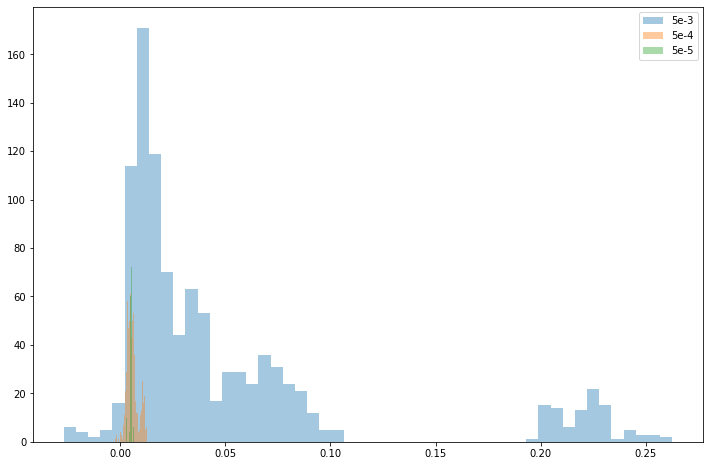

In [33]:
large = df.iloc[:nsims]
med = df.iloc[nsims:nsims*2]
small = df.iloc[nsims*2:]
plt.figure(figsize=(12,8))
for r, dat in zip(["5e-3", "5e-4", "5e-5"], [large, med, small]):
    rs = []
    for row in dat:
        rs.extend(dat[row].apply(lambda x: x["r"]))
    print(np.std(rs))
    plt.hist(rs, bins=50, label=r, alpha=0.4)
plt.legend()

# speciation rate shifts (ClaDS)

In [8]:
tree = PIED.Core("vartest-clads")
tree.set_param("ntaxa", 100)
tree.set_param("birth_rate", 0.3)
tree.set_param("process", "rate")
tree.set_param("abundance_mean", 5e3)
tree.set_param("abundance_sigma", 0)
tree.set_param("growth_rate_mean", 5e-3)
tree.set_param("growth_rate_sigma", 5e-3)
tree.set_param("ClaDS", "True")
tree.set_param("ClaDS_sigma", 0.2)
tree.set_param("ClaDS_alpha", 0.95)
tree.set_param("sequence_length", 1000)
tree.set_param("mutation_rate", 1e-9)
tree.set_param("sample_size", 5)
_ = tree.get_params(verbose=True)


------- PIED params file (v.0.0.2)----------------------------------------------
vartest-clads        ## [0] [simulation_name]: The name of this simulation scenario
./default_PIED       ## [1] [project_dir]: Where to save files
0.3                  ## [2] [birth_rate]: Speciation rate
taxa                 ## [3] [stop_criterion]: Whether to stop on ntaxa or time
100                  ## [4] [ntaxa]: Number of taxa to simulate if stop is `ntaxa`
4                    ## [5] [time]: Amount of time to simulate if stop is `time`
rate                 ## [6] [process]: Whether to evolve `abundance` or growth `rate` via BM
True                 ## [7] [ClaDS]: Whether to allow speciation rates to change along the branches a la ClaDS
5000                 ## [8] [abundance_mean]: Ancestral abundance at time 0
0.0                  ## [9] [abundance_sigma]: Rate at which abundance changes if process is `abundance`
0.005                ## [10] [growth_rate_mean]: Ancestral population growth rate at t

In [9]:
nsims=10
for r in [5e-3, 5e-4, 5e-5]:
    tree.set_param("growth_rate_sigma", r)
    tree.simulate(nsims=nsims, ipyclient=ipyclient)

    Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:01:12| 
     Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:00:22| 
     Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:00:43| 
 

In [30]:
simfile = "/home/isaac/PIED/jupyter-notebooks/default_PIED/vartest-clads-SIMOUT.csv"
_, df = PIED.util.load_sims(simfile)

0.041201550242730804
0.004178662579291941
0.0002461948467180016


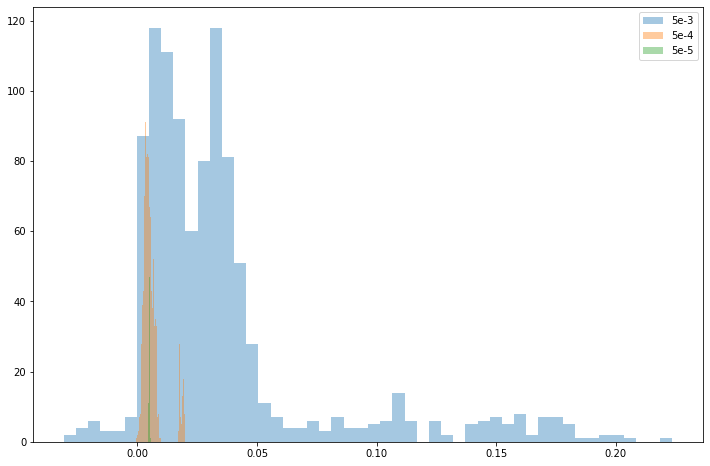

In [31]:
large = df.iloc[:nsims]
med = df.iloc[nsims:nsims*2]
small = df.iloc[nsims*2:]
plt.figure(figsize=(12,8))
for r, dat in zip(["5e-3", "5e-4", "5e-5"], [large, med, small]):
    rs = []
    for row in dat:
        rs.extend(dat[row].apply(lambda x: x["r"]))
    print(np.std(rs))
    plt.hist(rs, bins=50, label=r, alpha=0.4)
plt.legend()